In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("E:\Downlload\AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [58]:
df1 = df[['Date','Close']]
df1

,Date,Close
0,2014-09-29,99.620003
1,2014-10-06,100.730003
2,2014-10-13,97.669998
3,2014-10-20,105.220001
4,2014-10-27,108.000000
...,...,...
179,2018-03-05,179.979996
180,2018-03-12,178.020004
181,2018-03-19,164.940002
182,2018-03-26,167.779999


In [59]:
df1 = df1.rename(columns={"Close":'Close'})
df1

,Date,Close
0,2014-09-29,99.620003
1,2014-10-06,100.730003
2,2014-10-13,97.669998
3,2014-10-20,105.220001
4,2014-10-27,108.000000
...,...,...
179,2018-03-05,179.979996
180,2018-03-12,178.020004
181,2018-03-19,164.940002
182,2018-03-26,167.779999


In [60]:
df1 = df1.set_index(['Date'])
df1

,Close
Date,
2014-09-29,99.620003
2014-10-06,100.730003
2014-10-13,97.669998
2014-10-20,105.220001
2014-10-27,108.000000
...,...
2018-03-05,179.979996
2018-03-12,178.020004
2018-03-19,164.940002


In [62]:
import math
data = df1.diff()
data = data[1:]

Text(0.5, 1.0, 'ACF Before Diff')

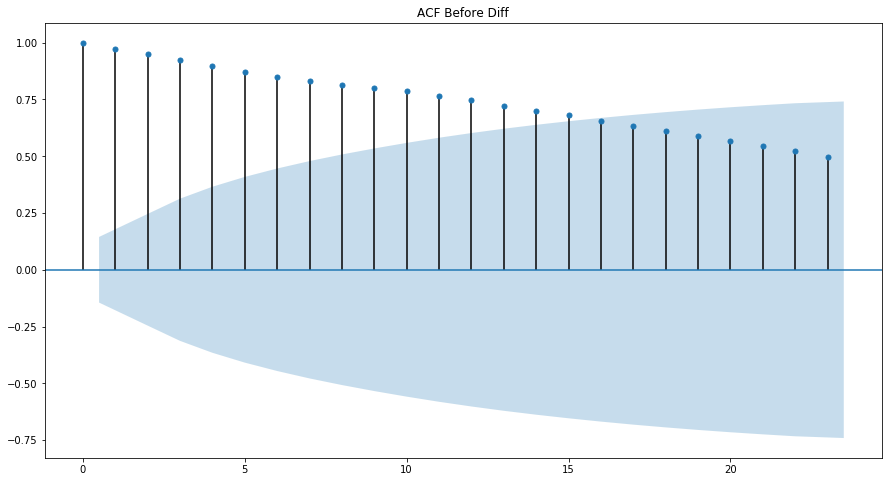

In [89]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1)
plt.title('ACF Before Diff')

Text(0.5, 1.0, 'ACF After Diff')

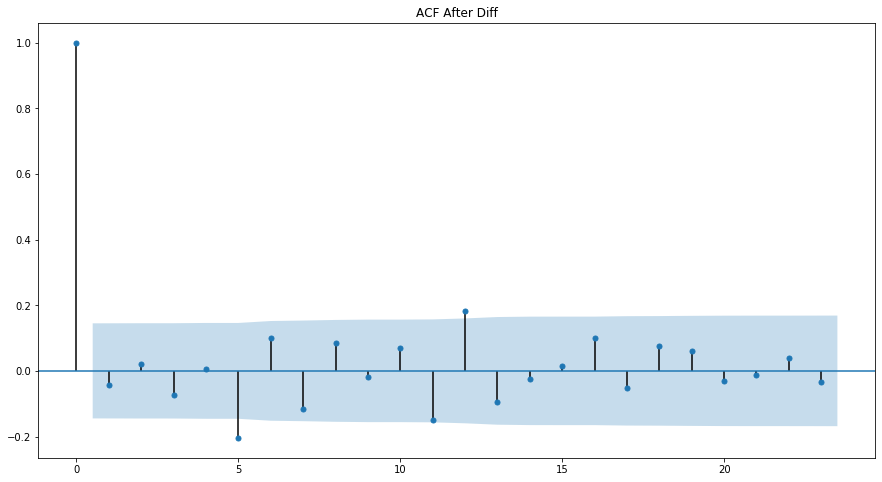

In [90]:
plot_acf(data)
plt.title('ACF After Diff')

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


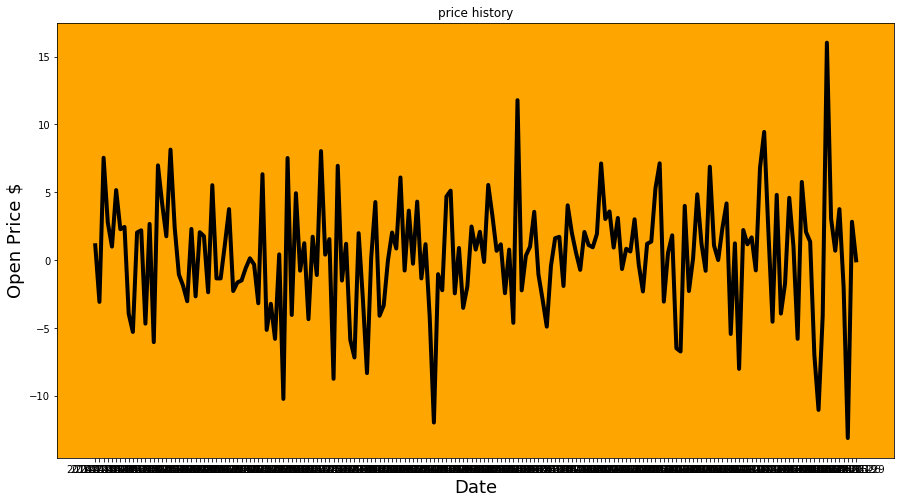

In [81]:
#df.plot(figsize=(15,5),color='red')
plt.rcParams["figure.figsize"] = 15,8
plt.title('price history')
plt.plot(data['Close'],color = 'black',linewidth=4)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open Price $',fontsize=18)
ax = plt.axes()
ax.set_facecolor("orange")
plt.show()

In [63]:
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

147

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.48762909],
       [0.3443299 ],
       [0.7089351 ],
       [0.54501739],
       [0.48419273],
       [0.62714796],
       [0.52817896],
       [0.53402082],
       [0.31443316],
       [0.26838513],
       [0.51993136],
       [0.52542975],
       [0.28934737],
       [0.54158099],
       [0.24261169],
       [0.68969118],
       [0.59312743],
       [0.51030937],
       [0.72955363],
       [0.53264621],
       [0.41374614],
       [0.38556689],
       [0.34604822],
       [0.52886642],
       [0.35841935],
       [0.52061879],
       [0.51065308],
       [0.36872877],
       [0.63951913],
       [0.40378019],
       [0.40378047],
       [0.48900369],
       [0.57903767],
       [0.3718217 ],
       [0.39347081],
       [0.39862576],
       [0.42989711],
       [0.45463945],
       [0.43883189],
       [0.34089354],
       [0.66735409],
       [0.27353984],
       [0.33951918],
       [0.25085905],
       [0.46460509],
       [0.09896927],
       [0.70824768],
       [0.311

In [65]:
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.48762909, 0.3443299 , 0.7089351 , 0.54501739, 0.48419273,
       0.62714796, 0.52817896, 0.53402082, 0.31443316, 0.26838513,
       0.51993136, 0.52542975, 0.28934737, 0.54158099, 0.24261169,
       0.68969118, 0.59312743, 0.51030937, 0.72955363, 0.53264621,
       0.41374614, 0.38556689, 0.34604822, 0.52886642, 0.35841935,
       0.52061879, 0.51065308, 0.36872877, 0.63951913, 0.40378019,
       0.40378047, 0.48900369, 0.57903767, 0.3718217 , 0.39347081,
       0.39862576, 0.42989711, 0.45463945, 0.43883189, 0.34089354,
       0.66735409, 0.27353984, 0.33951918, 0.25085905, 0.46460509,
       0.09896927, 0.70824768, 0.31134023, 0.61924432, 0.42336783,
       0.4927838 , 0.30068738, 0.50927878, 0.41237126, 0.72577352,
       0.46391767, 0.50309294, 0.14982823, 0.68866032, 0.39828181])]
[0.49140918978291176]

[array([0.48762909, 0.3443299 , 0.7089351 , 0.54501739, 0.48419273,
       0.62714796, 0.52817896, 0.53402082, 0.31443316, 0.26838513,
       0.51993136, 0.52542975, 0.28

In [66]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [67]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(87, 60, 1)

In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Using TensorFlow backend.
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

Instructions for updating:
Colocations handled automatically by placer.


In [69]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [70]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
87/87 [==============================] - 7s 83ms/step - loss: 0.0229


In [72]:
test_data = scaled_data[training_data_len - 60:,:]
x_test =[]
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [73]:
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(36, 60)
(36, 60, 1)


In [74]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [75]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.0031729931678774

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


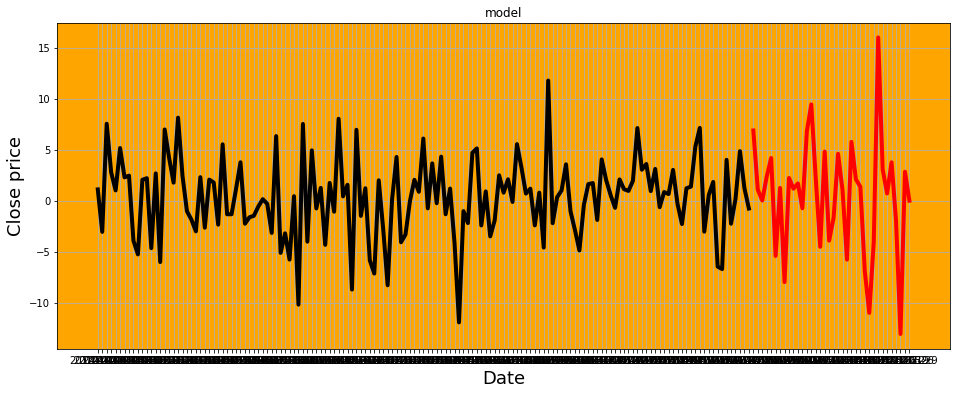

In [76]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('model')
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Close price' , fontsize=18)
plt.plot(train['Close'],color = 'black',linewidth=4)
plt.plot(valid['Close'],color = 'red',linewidth=4)
plt.grid()
ax = plt.axes()
ax.set_facecolor("orange")

In [46]:
x = df.values
x.size

184

In [51]:
train = x[0:150]
test = x[150:]

In [53]:
train,test

(array([[100.589996],
        [ 99.949997],
        [101.330002],
        [ 98.32    ],
        [104.849998],
        [108.220001],
        [109.019997],
        [114.269997],
        [116.849998],
        [118.809998],
        [114.099998],
        [110.699997],
        [112.160004],
        [113.790001],
        [108.290001],
        [112.599998],
        [107.839996],
        [113.739998],
        [118.050003],
        [118.550003],
        [127.489998],
        [130.020004],
        [129.25    ],
        [127.959999],
        [123.879997],
        [127.120003],
        [124.050003],
        [124.470001],
        [128.369995],
        [125.57    ],
        [132.309998],
        [129.5     ],
        [127.389999],
        [128.380005],
        [132.600006],
        [130.279999],
        [128.899994],
        [126.099998],
        [127.489998],
        [125.459999],
        [124.940002],
        [125.029999],
        [130.970001],
        [123.089996],
        [121.5     ],
        [1

In [54]:
predictions=[]

In [91]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\U

In [115]:
AR_prediction=model_ar_fit.predict(start =120, end =154)
AR_prediction

2017-01-23   -0.602068
2017-01-30    0.155971
2017-02-06    0.125698
2017-02-13    1.560638
2017-02-20   -0.604532
2017-02-27    0.577489
2017-03-06   -0.271905
2017-03-13    0.567056
2017-03-20   -0.827909
2017-03-27    0.708299
2017-04-03    0.132858
2017-04-10    0.980940
2017-04-17   -0.474149
2017-04-24    0.752156
2017-05-01    0.180454
2017-05-08    0.879382
2017-05-15    0.509909
2017-05-22    1.689416
2017-05-29   -0.524079
2017-06-05   -0.527557
2017-06-12   -0.107859
2017-06-19    0.333940
2017-06-26   -0.489495
2017-07-03    1.276171
2017-07-10    0.748141
2017-07-17    0.167583
2017-07-24    0.697886
2017-07-31    2.091750
2017-08-07   -1.225331
2017-08-14    0.086394
2017-08-21    0.928604
2017-08-28    0.041313
2017-09-04   -1.067947
2017-09-11    1.400858
2017-09-18   -0.314293
Freq: W-MON, dtype: float64

In [93]:
model_ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      C  -                  l                  o
Model:                         AR(13)   Log Likelihood                -363.732
Method:                          cmle   S.D. of innovations              3.653
Date:                Fri, 08 May 2020   AIC                              2.815
Time:                        22:24:06   BIC                              3.139
Sample:                    10-06-2014   HQIC                             2.947
                         - 07-24-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2877      0.348      0.826      0.409      -0.395       0.971
L1.Close      -0.0344      0.091     -0.380      0.704      -0.212       0.143
L2.Close       0.1226      0.090      1.366      0.172      -0.053       0.298
L3.Close      -0.0206      0.090     -0.228      0.819      -0.198       0.156
L4.Close      -0.0315      0.090     -0.351      0.726      -0.207       0.144
L5.Close      -0.1016      0.089     -1.136      0.256      -0.277       0.074
L6.Close       0.0196      0.090      0.218      0.827      -0.156       0.195
L7.Close      -0.0586      0.090     -0.650      0.516      -0.235       0.118
L8.Close       0.0628      0.091      0.691      0.490      -0.116       0.241
L9.Close       0.0131      0.091      0.143      0.886      -0.166       0.192
L10.Close      0.0151      0.091      0.166      0.868      -0.164       0.194
L11.Close     -0.1215      0.091     -1.341      0.180      -0.299       0.056
L12.Close      0.1361      0.091      1.498      0.134      -0.042       0.314
L13.Close      0.0121      0.093      0.130      0.896      -0.169       0.194
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0607           -0.0000j            1.0607           -0.5000
AR.2            -0.9829           -0.6053j            1.1543           -0.4122
AR.3            -0.9829           +0.6053j            1.1543            0.4122
AR.4            -0.5501           -0.9968j            1.1385           -0.3303
AR.5            -0.5501           +0.9968j            1.1385            0.3303
AR.6             0.0692           -1.1629j            1.1650           -0.2405
AR.7             0.0692           +1.1629j            1.1650            0.2405
AR.8             0.7261           -0.9821j            1.2214           -0.1487
AR.9             0.7261           +0.9821j            1.2214            0.1487
AR.10            1.0586           -0.5875j            1.2107           -0.0806
AR.11            1.0586           +0.5875j            1.2107            0.0806
AR.12            1.2577           -0.0000j            1.2577           -0.0000
AR.13          -12.1239           -0.0000j           12.1239           -0.5000
------------------------------------------------------------------------------
"""

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


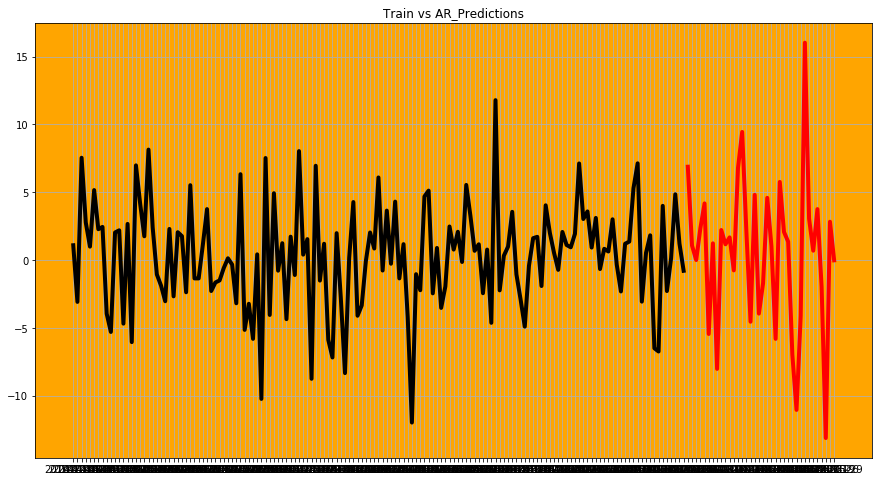

In [103]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['AR_predictions'] = AR_prediction
plt.plot(train,color = 'black',linewidth=4)
plt.plot(valid,color = 'Red',linewidth=4)
plt.title("Train vs AR_Predictions")
plt.grid()
ax = plt.axes()
ax.set_facecolor("orange")

In [107]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(3,1,1))
model_arima_fit = model_arima.fit()
model_arima_fit

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [121]:
pred = model_arima_fit.forecast(steps=36)[0]
pred

array([0.59658937, 0.42388503, 0.72145915, 0.61707606, 0.67603511,
       0.64757388, 0.66621355, 0.66215753, 0.67013933, 0.67201094,
       0.67699506, 0.68037334, 0.68456979, 0.68834669, 0.69233849,
       0.69622036, 0.70015856, 0.70406793, 0.70799205, 0.71190862,
       0.71582906, 0.71974752, 0.72366699, 0.72758594, 0.73150516,
       0.73542424, 0.73934339, 0.7432625 , 0.74718164, 0.75110076,
       0.75501989, 0.75893902, 0.76285815, 0.76677727, 0.7706964 ,
       0.77461553])

In [109]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  146
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -404.422
Method:                       css-mle   S.D. of innovations              3.796
Date:                Fri, 08 May 2020   AIC                            820.843
Time:                        22:30:34   BIC                            838.745
Sample:                    10-13-2014   HQIC                           828.117
                         - 07-24-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0039      0.008      0.518      0.605      -0.011       0.019
ar.L1.D.Close    -0.0603      0.083     -0.730      0.466      -0.222       0.102
ar.L2.D.Close     0.1358      0.082      1.654      0.098      -0.025       0.297
ar.L3.D.Close    -0.0489      0.084     -0.584      0.559      -0.213       0.115
ma.L1.D.Close    -1.0000      0.028    -36.180      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9531           -0.0000j            1.9531           -0.5000
AR.2            2.3655           -2.2086j            3.2363           -0.1195
AR.3            2.3655           +2.2086j            3.2363            0.1195
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [112]:
len(train),len(valid)

(147, 36)

In [122]:
len(pred)

36

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


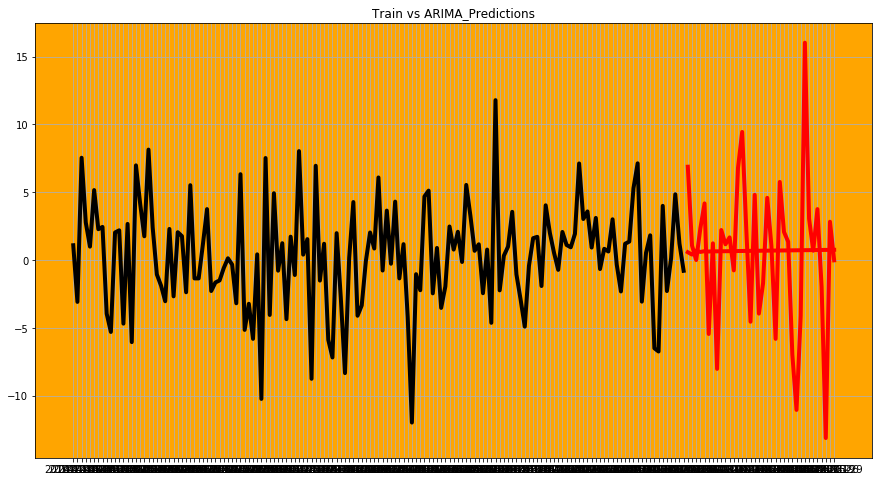

In [123]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['ARIMA_predictions'] = pred
plt.plot(train,color = 'black',linewidth=4)
plt.plot(valid,color = 'Red',linewidth=4)
plt.title("Train vs ARIMA_Predictions")
plt.grid()
ax = plt.axes()
ax.set_facecolor("orange")

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model_sarimax = SARIMAX(train, order = (1, 1, 1), seasonal_order =(2, 1, 1, 12)) 

model_sarimax_fit = model_sarimax.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [128]:
sr_pred = model_sarimax_fit.predict(start =151, end =186,typ = 'levels',dynamic =True)
len(sr_pred)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


36

In [129]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  147
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -385.751
Date:                            Fri, 08 May 2020   AIC                            783.503
Time:                                    22:35:21   BIC                            800.890
Sample:                                10-06-2014   HQIC                           790.568
                                     - 07-24-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0698      0.091     -0.764      0.445      -0.249       0.109
ma.L1         -0.9685      0.052    -18.672      0.000      -1.070      -0.867
ar.S.L12       0.1965      0.174      1.131      0.258      -0.144       0.537
ar.S.L24       0.1000      0.130      0.770      0.441      -0.155       0.355
ma.S.L12      -0.9973      9.837     -0.101      0.919     -20.277      18.283
sigma2        15.0995    146.701      0.103      0.918    -272.430     302.629
===================================================================================
Ljung-Box (Q):                       34.00   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.74   Prob(JB):                         0.54
Heteroskedasticity (H):               0.67   Skew:                             0.22
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


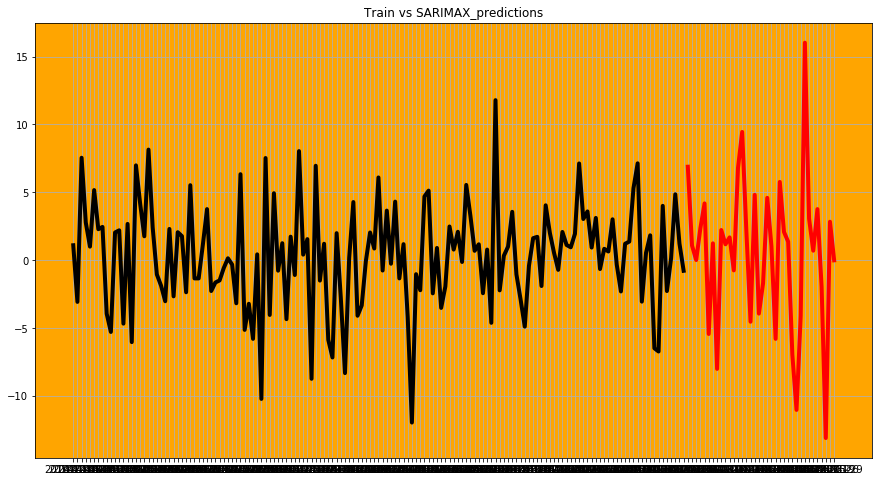

In [130]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['SARIMAX_predictions'] = sr_pred
plt.plot(train,color = 'black',linewidth=4)
plt.plot(valid,color = 'Red',linewidth=4)
plt.title("Train vs SARIMAX_predictions")
plt.grid()
ax = plt.axes()
ax.set_facecolor("orange")